In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
ts.shape

(1028, 1209)

In [3]:
cut_columns=['track_id','Unnamed: 0', 'Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)

In [4]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [5]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts_scaled = scaler.fit_transform(ts)

In [6]:
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape

(1028, 1206)

In [7]:
ts_scaled= pd.DataFrame(ts_scaled, index=ts.index, columns=ts.columns)

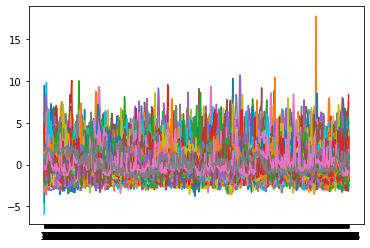

In [8]:
plt.plot(np.squeeze(ts_scaled.T))
plt.show()

## Apply SAX

In [9]:
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize
from saxpy.paa import paa

discretized_time_series = list()

for index, row in ts.iterrows():
    x = ts_to_string(paa(znorm(row),10), cuts_for_asize(7)) #7 symbols(letters)
    discretized_time_series.append(x)

In [10]:
print(len(discretized_time_series))

1028


In [11]:
print(discretized_time_series)

['bdfbaeccfg', 'bfgffcccba', 'cdcdeedcdd', 'dfecddccec', 'cccdeddeed', 'debdededdd', 'ecedddefbc', 'deececdddd', 'ddcdeedeed', 'cdfgdebccb', 'effedbcbcd', 'dcbceeeeec', 'degecccccc', 'eeddddddcc', 'cccccegdcf', 'ceeccdbfdd', 'bebececddf', 'eeceddecdb', 'cdeddecedc', 'ddecdcdddd', 'dcceeeddbe', 'eecceeddcd', 'efddddccdd', 'ddecddedcd', 'eddecdeddc', 'cdddddcedd', 'ceccfddece', 'bbceeefddc', 'ddbceebfec', 'cdcddcebef', 'cbcaegdcfe', 'cdbbcffgcc', 'dgdddgdcbb', 'cdeefbbecf', 'dcbdcbddgg', 'bcbcdefffd', 'effefdacbc', 'ecbdcddfed', 'eefedccbdc', 'bdeccddegd', 'ffgfebbbbc', 'ggbbbbedcb', 'edeeefccba', 'gffddcbbbd', 'edcceedced', 'gdcdcdcecd', 'ceddddddeb', 'eedbdddddc', 'deccdddcee', 'cfebcdddec', 'dedccccddf', 'dfeefdbbbd', 'ccccdeeeed', 'dccededcce', 'ceeeddccde', 'dddddddddd', 'fcccbcdfgc', 'eeggecbabb', 'cbaegfdebf', 'debacceeff', 'efcefgdbba', 'eccbdegeeb', 'fcebbbcbfg', 'deacefedde', 'ddcdcfdedc', 'deffebacdd', 'fdgfccbbbe', 'cccdegeccc', 'dggdbacbed', 'cddcdcccgc', 'aeddcceefd', 'eabe

# Sequential Pattern Mining

In [24]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [37]:
ps = PrefixSpan(discretized_time_series)
ps.minlen=4

In [39]:
sup15=ps.frequent(15)
sup15.sort()
print(len(sup15))
sup15

3087


[(15, ['a', 'b', 'f', 'e']),
 (15, ['a', 'e', 'd', 'c']),
 (15, ['b', 'b', 'b', 'f', 'f']),
 (15, ['b', 'b', 'c', 'c', 'e']),
 (15, ['b', 'b', 'c', 'd', 'f']),
 (15, ['b', 'b', 'e', 'b']),
 (15, ['b', 'b', 'e', 'd', 'e']),
 (15, ['b', 'b', 'e', 'e', 'd']),
 (15, ['b', 'c', 'c', 'd', 'g']),
 (15, ['b', 'c', 'd', 'e', 'e', 'e']),
 (15, ['b', 'c', 'e', 'd', 'e', 'e']),
 (15, ['b', 'c', 'f', 'f', 'f']),
 (15, ['b', 'c', 'g', 'f']),
 (15, ['b', 'd', 'c', 'f', 'e']),
 (15, ['b', 'd', 'd', 'b', 'e']),
 (15, ['b', 'd', 'd', 'c', 'e', 'd']),
 (15, ['b', 'd', 'd', 'd', 'e', 'd']),
 (15, ['b', 'd', 'd', 'e', 'd', 'd']),
 (15, ['b', 'd', 'd', 'f', 'f']),
 (15, ['b', 'd', 'e', 'd', 'd', 'e']),
 (15, ['b', 'd', 'f', 'e', 'f']),
 (15, ['b', 'd', 'g', 'e']),
 (15, ['b', 'e', 'b', 'e', 'c']),
 (15, ['b', 'e', 'c', 'c', 'c']),
 (15, ['b', 'e', 'c', 'e', 'f']),
 (15, ['b', 'e', 'c', 'g']),
 (15, ['b', 'e', 'd', 'c', 'f']),
 (15, ['b', 'e', 'd', 'd', 'd', 'e']),
 (15, ['b', 'e', 'f', 'd', 'e']),
 (15, ['b

In [40]:
sup30=ps.frequent(30)
sup30.sort()
print(len(sup30))
sup30

1299


[(30, ['b', 'b', 'd', 'g']),
 (30, ['b', 'd', 'e', 'c', 'e']),
 (30, ['b', 'e', 'b', 'c']),
 (30, ['b', 'e', 'e', 'c', 'e']),
 (30, ['b', 'e', 'e', 'd', 'c']),
 (30, ['c', 'b', 'd', 'e', 'e']),
 (30, ['c', 'b', 'd', 'g']),
 (30, ['c', 'b', 'e', 'e', 'd']),
 (30, ['c', 'b', 'f', 'd', 'd']),
 (30, ['c', 'c', 'c', 'b', 'f']),
 (30, ['c', 'c', 'c', 'd', 'd', 'd']),
 (30, ['c', 'c', 'c', 'd', 'd', 'e']),
 (30, ['c', 'c', 'e', 'f', 'd']),
 (30, ['c', 'd', 'e', 'd', 'e', 'd']),
 (30, ['c', 'd', 'e', 'e', 'd', 'c']),
 (30, ['c', 'e', 'd', 'd', 'e', 'd']),
 (30, ['c', 'e', 'e', 'c', 'b']),
 (30, ['c', 'e', 'e', 'e', 'b']),
 (30, ['c', 'f', 'c', 'd', 'c']),
 (30, ['c', 'f', 'd', 'e', 'c']),
 (30, ['c', 'f', 'f', 'b']),
 (30, ['c', 'f', 'f', 'f']),
 (30, ['d', 'b', 'd', 'c', 'd']),
 (30, ['d', 'c', 'b', 'd', 'd']),
 (30, ['d', 'c', 'c', 'c', 'd', 'd']),
 (30, ['d', 'c', 'c', 'd', 'd', 'c']),
 (30, ['d', 'c', 'c', 'g']),
 (30, ['d', 'c', 'd', 'f', 'c']),
 (30, ['d', 'd', 'b', 'e', 'd']),
 (30, ['d

In [48]:
sup45=ps.frequent(45)
sup45.sort()
print(len(sup45))
sup45

763


[(45, ['b', 'b', 'e', 'c']),
 (45, ['b', 'd', 'd', 'e', 'e']),
 (45, ['b', 'f', 'e', 'c']),
 (45, ['c', 'c', 'e', 'c', 'e']),
 (45, ['c', 'd', 'c', 'e', 'c']),
 (45, ['c', 'e', 'c', 'e', 'e']),
 (45, ['c', 'e', 'd', 'd', 'd', 'd']),
 (45, ['d', 'c', 'd', 'd', 'c', 'd']),
 (45, ['d', 'c', 'd', 'e', 'd', 'd']),
 (45, ['d', 'd', 'c', 'c', 'c', 'd']),
 (45, ['d', 'd', 'd', 'e', 'c', 'd']),
 (45, ['d', 'd', 'd', 'f', 'd']),
 (45, ['d', 'e', 'd', 'd', 'e', 'd']),
 (45, ['d', 'e', 'e', 'd', 'b']),
 (45, ['d', 'f', 'f', 'c']),
 (45, ['e', 'd', 'd', 'c', 'b']),
 (45, ['e', 'e', 'c', 'c', 'e']),
 (45, ['f', 'c', 'c', 'd', 'd']),
 (45, ['f', 'd', 'c', 'd', 'c']),
 (45, ['f', 'f', 'd', 'b']),
 (46, ['b', 'b', 'c', 'c']),
 (46, ['b', 'b', 'f', 'e']),
 (46, ['b', 'd', 'e', 'e', 'e']),
 (46, ['b', 'e', 'd', 'd', 'e']),
 (46, ['c', 'b', 'b', 'e']),
 (46, ['c', 'c', 'd', 'g']),
 (46, ['c', 'd', 'e', 'c', 'e']),
 (46, ['c', 'd', 'e', 'd', 'd', 'd']),
 (46, ['c', 'e', 'f', 'f']),
 (46, ['d', 'b', 'f', 'd

In [47]:
sup90=ps.frequent(90)
sup90.sort()
print(len(sup90))
sup90

245


[(90, ['b', 'd', 'c', 'd']),
 (90, ['c', 'd', 'e', 'd', 'c']),
 (90, ['c', 'd', 'e', 'e', 'd']),
 (90, ['d', 'c', 'c', 'd', 'c']),
 (90, ['d', 'f', 'e', 'e']),
 (90, ['e', 'd', 'd', 'e', 'c']),
 (90, ['e', 'e', 'b', 'c']),
 (91, ['c', 'd', 'd', 'e', 'c']),
 (91, ['d', 'c', 'f', 'c']),
 (91, ['e', 'd', 'b', 'c']),
 (91, ['e', 'd', 'c', 'd', 'e']),
 (91, ['f', 'd', 'e', 'd']),
 (92, ['c', 'b', 'c', 'd']),
 (92, ['c', 'c', 'd', 'd', 'c']),
 (92, ['c', 'd', 'f', 'e']),
 (92, ['c', 'f', 'd', 'c']),
 (92, ['d', 'b', 'e', 'e']),
 (92, ['d', 'c', 'c', 'd', 'e']),
 (92, ['d', 'c', 'f', 'e']),
 (92, ['d', 'd', 'f', 'e']),
 (92, ['e', 'c', 'd', 'd', 'e']),
 (92, ['e', 'f', 'c', 'c']),
 (93, ['c', 'c', 'e', 'f']),
 (93, ['c', 'f', 'e', 'd']),
 (93, ['e', 'd', 'c', 'c', 'c']),
 (93, ['e', 'e', 'c', 'b']),
 (94, ['c', 'd', 'f', 'c']),
 (94, ['d', 'c', 'e', 'e', 'd']),
 (94, ['d', 'd', 'c', 'e', 'e']),
 (94, ['f', 'e', 'c', 'd']),
 (95, ['b', 'c', 'e', 'e']),
 (95, ['c', 'f', 'c', 'c']),
 (95, ['d', 

In [46]:
ps.topk(5)

[(394, ['d', 'd', 'd', 'd']),
 (352, ['d', 'd', 'd', 'c']),
 (341, ['d', 'd', 'c', 'd']),
 (325, ['d', 'c', 'd', 'd']),
 (323, ['c', 'd', 'd', 'd'])]

In [45]:
#top 10 most frequent sequences 
ps.topk(5, closed=True)

[(394, ['d', 'd', 'd', 'd']),
 (352, ['d', 'd', 'd', 'c']),
 (341, ['d', 'd', 'c', 'd']),
 (325, ['d', 'c', 'd', 'd']),
 (323, ['c', 'd', 'd', 'd'])]